In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df201226 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_201226.txt')
df201219=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_201219.txt')
df201212=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_201212.txt')
df201205=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_201205.txt')

df191228 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_191228.txt')
df191221=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_191221.txt')
df191214=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_191214.txt')
df191207=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_191207.txt')

df181229 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_181229.txt')
df181222=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_181222.txt')
df181215=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_181215.txt')
df181208=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_181208.txt')
df181201=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_181201.txt')

mta=pd.concat([df181201,df181208,df181215,df181222,df181229, df191207, df191214,df191221, df191228,
              df201205,df201212,df201219, df201226 ])

In [3]:
mta.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,03:00:00,REGULAR,6845468,2321627
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,07:00:00,RECOVR AUD,6845479,2321635
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,11:00:00,RECOVR AUD,6845578,2321702
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,15:00:00,RECOVR AUD,6845780,2321753
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,19:00:00,REGULAR,6846083,2321818


In [4]:
mta.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
212294,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,04:00:00,REGULAR,5554,541
212295,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,08:00:00,REGULAR,5554,541
212296,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,12:00:00,REGULAR,5554,541
212297,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,16:00:00,REGULAR,5554,541
212298,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,20:00:00,REGULAR,5554,541


In [5]:
#Text dosyalarını birbirine ekleyince her bir verinin kendi indexini alıyor düzeltmek için:
mta.reset_index(drop=True, inplace=True)

In [6]:
mta.shape

(2672783, 11)

In [7]:
mta.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2672778,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,04:00:00,REGULAR,5554,541
2672779,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,08:00:00,REGULAR,5554,541
2672780,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,12:00:00,REGULAR,5554,541
2672781,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,16:00:00,REGULAR,5554,541
2672782,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,20:00:00,REGULAR,5554,541


In [8]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672783 entries, 0 to 2672782
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                          

In [9]:
#strip space in columns name:
mta.columns = mta.columns.str.strip()

In [10]:
mta.columns = mta.columns.str.lower()

In [11]:
mta.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [12]:
#delete unnecessary columns:
mta.drop(["linename", 'division', 'desc'], axis = 1, inplace=True)

In [13]:
mta.head()

,c/a,unit,scp,station,date,time,entries,exits
0,A002,R051,02-00-00,59 ST,11/24/2018,03:00:00,6845468,2321627
1,A002,R051,02-00-00,59 ST,11/24/2018,07:00:00,6845479,2321635
2,A002,R051,02-00-00,59 ST,11/24/2018,11:00:00,6845578,2321702
3,A002,R051,02-00-00,59 ST,11/24/2018,15:00:00,6845780,2321753
4,A002,R051,02-00-00,59 ST,11/24/2018,19:00:00,6846083,2321818


In [14]:
# since dtype of them is object we can combine them by using "+"
mta["datetime"] = mta["date"] + " " + mta["time"]
mta.head()

,c/a,unit,scp,station,date,time,entries,exits,datetime
0,A002,R051,02-00-00,59 ST,11/24/2018,03:00:00,6845468,2321627,11/24/2018 03:00:00
1,A002,R051,02-00-00,59 ST,11/24/2018,07:00:00,6845479,2321635,11/24/2018 07:00:00
2,A002,R051,02-00-00,59 ST,11/24/2018,11:00:00,6845578,2321702,11/24/2018 11:00:00
3,A002,R051,02-00-00,59 ST,11/24/2018,15:00:00,6845780,2321753,11/24/2018 15:00:00
4,A002,R051,02-00-00,59 ST,11/24/2018,19:00:00,6846083,2321818,11/24/2018 19:00:00


In [15]:
mta["datetime"] = pd.to_datetime(mta["datetime"])

In [16]:
mta["date"] = pd.to_datetime(mta["date"])

In [17]:
mta["dayname"] = mta["datetime"].dt.day_name()

In [18]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672783 entries, 0 to 2672782
Data columns (total 10 columns):
 #   Column    Dtype         
---  ------    -----         
 0   c/a       object        
 1   unit      object        
 2   scp       object        
 3   station   object        
 4   date      datetime64[ns]
 5   time      object        
 6   entries   int64         
 7   exits     int64         
 8   datetime  datetime64[ns]
 9   dayname   object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 203.9+ MB


In [19]:
mta["c/a"].value_counts()

PTH22    23320
R610     12669
PTH02    12587
PTH03    12407
PTH05    11853
         ...  
R411      1095
J022      1092
H037      1092
N206      1008
A085       545
Name: c/a, Length: 751, dtype: int64

In [20]:
mta["unit"].value_counts()

R549    37257
R014    27475
R057    26847
R029    25816
R540    25795
        ...  
R455     1614
R262     1593
R280     1535
R349     1092
R435     1092
Name: unit, Length: 469, dtype: int64

In [21]:
mta["scp"].value_counts()

00-00-00    251495
00-00-01    249795
00-00-02    222646
00-00-03    112159
00-03-00     93878
             ...  
03-00-08         3
00-F6-01         1
00-10-00         1
02-01-08         1
04-03-04         1
Name: scp, Length: 230, dtype: int64

In [22]:
mta["station"].value_counts()

34 ST-PENN STA     55240
FULTON ST          52626
GRD CNTRL-42 ST    41627
23 ST              39926
86 ST              33236
                   ...  
ALLERTON AV         1631
BEVERLEY ROAD       1593
190 ST              1535
CLEVELAND ST        1092
SUTTER AV           1092
Name: station, Length: 378, dtype: int64

In [23]:
mta.isnull().any()

c/a         False
unit        False
scp         False
station     False
date        False
time        False
entries     False
exits       False
datetime    False
dayname     False
dtype: bool

In [24]:
# We can combine the columns that identify the turnstiles
mta["turnstile"] = mta["c/a"] + "-" + mta["unit"] + "-" + mta["scp"] + "-" + mta["station"]
mta.head(12)

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile
0,A002,R051,02-00-00,59 ST,2018-11-24,03:00:00,6845468,2321627,2018-11-24 03:00:00,Saturday,A002-R051-02-00-00-59 ST
1,A002,R051,02-00-00,59 ST,2018-11-24,07:00:00,6845479,2321635,2018-11-24 07:00:00,Saturday,A002-R051-02-00-00-59 ST
2,A002,R051,02-00-00,59 ST,2018-11-24,11:00:00,6845578,2321702,2018-11-24 11:00:00,Saturday,A002-R051-02-00-00-59 ST
3,A002,R051,02-00-00,59 ST,2018-11-24,15:00:00,6845780,2321753,2018-11-24 15:00:00,Saturday,A002-R051-02-00-00-59 ST
4,A002,R051,02-00-00,59 ST,2018-11-24,19:00:00,6846083,2321818,2018-11-24 19:00:00,Saturday,A002-R051-02-00-00-59 ST
5,A002,R051,02-00-00,59 ST,2018-11-24,23:00:00,6846261,2321843,2018-11-24 23:00:00,Saturday,A002-R051-02-00-00-59 ST
6,A002,R051,02-00-00,59 ST,2018-11-25,03:00:00,6846296,2321858,2018-11-25 03:00:00,Sunday,A002-R051-02-00-00-59 ST
7,A002,R051,02-00-00,59 ST,2018-11-25,07:00:00,6846304,2321868,2018-11-25 07:00:00,Sunday,A002-R051-02-00-00-59 ST
8,A002,R051,02-00-00,59 ST,2018-11-25,11:00:00,6846361,2321919,2018-11-25 11:00:00,Sunday,A002-R051-02-00-00-59 ST
9,A002,R051,02-00-00,59 ST,2018-11-25,15:00:00,6846560,2321983,2018-11-25 15:00:00,Sunday,A002-R051-02-00-00-59 ST


**Calculation of counts of people who entry on each turnstile for determine daily entries**

In [25]:
mta.sort_values(by=["datetime"], inplace=True)

In [26]:
mta.tail()

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile
2581499,PTH02,R544,00-00-00,HARRISON,2020-12-25,23:54:55,113074,16657,2020-12-25 23:54:55,Friday,PTH02-R544-00-00-00-HARRISON
2583965,PTH04,R551,00-01-03,GROVE STREET,2020-12-25,23:56:56,373539,626242,2020-12-25 23:56:56,Friday,PTH04-R551-00-01-03-GROVE STREET
2592216,PTH21,R540,01-00-03,PATH WTC 2,2020-12-25,23:57:15,5366,42290,2020-12-25 23:57:15,Friday,PTH21-R540-01-00-03-PATH WTC 2
2588382,PTH16,R550,01-00-02,LACKAWANNA,2020-12-25,23:58:37,2461,5091,2020-12-25 23:58:37,Friday,PTH16-R550-01-00-02-LACKAWANNA
2588262,PTH13,R541,00-04-09,THIRTY ST,2020-12-25,23:59:52,42,37,2020-12-25 23:59:52,Friday,PTH13-R541-00-04-09-THIRTY ST


# BURADAN ITIBAREN GROUP BY'A STATION BILGISINI DE EKLEMEYE BASLADIK KI SONRA STATIONA GORE SUM ALDIRABILELIM

In [27]:
mta.groupby(["turnstile","station"])[["entries"]].max()

,,entries
turnstile,station,
A002-R051-02-00-00-59 ST,59 ST,7508502
A002-R051-02-00-01-59 ST,59 ST,6657152
A002-R051-02-03-00-59 ST,59 ST,1406768
A002-R051-02-03-01-59 ST,59 ST,1529850
A002-R051-02-03-02-59 ST,59 ST,6612649
...,...,...
TRAM2-R469-00-00-01-RIT-ROOSEVELT,RIT-ROOSEVELT,3621906
TRAM2-R469-00-03-00-RIT-ROOSEVELT,RIT-ROOSEVELT,753039
TRAM2-R469-00-03-01-RIT-ROOSEVELT,RIT-ROOSEVELT,3133524


In [28]:
mta["counts"] = mta.groupby(["turnstile","station"])["entries"].diff()

In [29]:
#kontrol için:
mta.groupby(["turnstile", "station", "datetime"])[["entries","counts"]].max().head(100)

entries  counts
turnstile                station datetime                            
A002-R051-02-00-00-59 ST 59 ST   2018-11-24 03:00:00  6845468     NaN
                                 2018-11-24 07:00:00  6845479    11.0
                                 2018-11-24 11:00:00  6845578    99.0
                                 2018-11-24 15:00:00  6845780   202.0
                                 2018-11-24 19:00:00  6846083   303.0
...                                                       ...     ...
                                 2018-12-09 23:00:00  6864749   156.0
                                 2018-12-10 03:00:00  6864772    23.0
                                 2018-12-10 07:00:00  6864782    10.0
                                 2018-12-10 11:00:00  6864933   151.0
                                 2018-12-10 15:00:00  6865186   253.0

[100 rows x 2 columns]

In [30]:
(mta.counts < 0).any()

True

In [31]:
mta[mta.counts < 0]

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts
165505,R304,R206,00-00-00,125 ST,2018-11-24,04:00:00,1691635476,789296721,2018-11-24 04:00:00,Saturday,R304-R206-00-00-00-125 ST,-27.0
151092,R227,R131,00-00-00,23 ST,2018-11-24,04:00:00,920259537,886527620,2018-11-24 04:00:00,Saturday,R227-R131-00-00-00-23 ST,-35.0
196468,R646,R110,01-00-01,FLATBUSH AV-B.C,2018-11-24,04:00:00,1507194731,1314218620,2018-11-24 04:00:00,Saturday,R646-R110-01-00-01-FLATBUSH AV-B.C,-4.0
54717,N078,R175,01-03-00,14 ST,2018-11-24,04:00:00,2129612445,1156126507,2018-11-24 04:00:00,Saturday,N078-R175-01-03-00-14 ST,-59.0
25618,D011,R394,01-06-01,BAY PKWY,2018-11-24,04:00:00,775698391,1698253265,2018-11-24 04:00:00,Saturday,D011-R394-01-06-01-BAY PKWY,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2541554,N305,R017,01-03-04,LEXINGTON AV/53,2020-12-25,23:00:00,331361063,1596075738,2020-12-25 23:00:00,Friday,N305-R017-01-03-04-LEXINGTON AV/53,-9.0
2600573,R127,R105,00-00-00,14 ST,2020-12-25,23:00:00,1224845264,1510386756,2020-12-25 23:00:00,Friday,R127-R105-00-00-00-14 ST,-42.0
2538116,N215,R237,00-00-02,182-183 STS,2020-12-25,23:00:00,1475326207,1845900164,2020-12-25 23:00:00,Friday,N215-R237-00-00-02-182-183 STS,-47.0
2536679,N207,R104,00-00-00,167 ST,2020-12-25,23:00:00,1828025230,1829310662,2020-12-25 23:00:00,Friday,N207-R104-00-00-00-167 ST,-50.0


In [32]:
#bazı satırları kontrol edelim:

In [33]:
mta[mta.index == 1415465]

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts
1415465,A002,R051,02-05-00,59 ST,2019-12-17,11:00:00,212,0,2019-12-17 11:00:00,Tuesday,A002-R051-02-05-00-59 ST,1.0


In [34]:
mta[mta.index == 1415466]

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts
1415466,A002,R051,02-05-00,59 ST,2019-12-17,15:00:00,216,0,2019-12-17 15:00:00,Tuesday,A002-R051-02-05-00-59 ST,4.0


In [35]:
mta[mta.index == 1415467]

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts
1415467,A002,R051,02-05-00,59 ST,2019-12-18,11:00:00,12,0,2019-12-18 11:00:00,Wednesday,A002-R051-02-05-00-59 ST,-204.0


In [36]:
mta["counts"] = np.where((mta.counts < 0), abs(mta["counts"]), mta["counts"])

In [37]:
(mta.counts < 0).any()

False

**Counts of people who exit from each turnstile for determine daily exits**

In [38]:
mta["counts_exits"] = mta.groupby(["turnstile"])[["exits"]].diff()

In [39]:
(mta.counts_exits < 0).any()

True

In [40]:
mta.counts_exits = abs(mta.counts_exits)

In [41]:
(mta.counts_exits < 0).any()

False

**Daily total counts of people enter for each turnstile**

In [42]:
mta.groupby(["turnstile","station","date", "dayname"])[["counts"]].sum().sort_values("counts") # shows daily total entries for each turnstile

counts
turnstile                           station         date       dayname                
TRAM2-R469-00-05-01-RIT-ROOSEVELT   RIT-ROOSEVELT   2020-12-25 Friday     0.000000e+00
R262A-R195-04-00-02-161/YANKEE STAD 161/YANKEE STAD 2020-11-30 Monday     0.000000e+00
                                                    2020-11-29 Sunday     0.000000e+00
                                                    2020-11-28 Saturday   0.000000e+00
N087-R282-01-05-00-SPRING ST        SPRING ST       2018-12-21 Friday     0.000000e+00
...                                                                                ...
R329-R362-00-00-00-ALLERTON AV      ALLERTON AV     2019-11-30 Saturday   2.038503e+09
N534-R220-01-00-02-CARROLL ST       CARROLL ST      2020-11-28 Saturday   2.038664e+09
R329-R362-00-00-00-ALLERTON AV      ALLERTON AV     2019-12-11 Wednesday  2.046736e+09
R729-R292-00-00-02-BAYCHESTER AV    BAYCHESTER AV   2019-11-30 Saturday   2.055864e+09
N078-R175-01-03-00-14 ST            14 ST           2019-11-30 Saturday   2.129491e+09

[443003 rows x 1 columns]

In [43]:
(mta.counts_exits == 0).sum()
# 0 larla sonra ilgilen

406272

In [44]:
(mta.counts == 0).sum()
# 0 larla sonra ilgilen

448353

In [45]:
entries_count = mta.groupby(["turnstile", "station","date", "dayname"], as_index=False)[["counts"]].sum().sort_values("counts")
# a new dataset contains daily total entries for each turnstile

In [46]:
entries_count.iloc[200:220, :]

,turnstile,station,date,dayname,counts
124975,N087-R282-01-05-00-SPRING ST,SPRING ST,2019-12-13,Friday,0.0
236408,N601A-R319-01-05-00-LEXINGTON AV/63,LEXINGTON AV/63,2019-12-03,Tuesday,0.0
124973,N087-R282-01-05-00-SPRING ST,SPRING ST,2019-12-11,Wednesday,0.0
124972,N087-R282-01-05-00-SPRING ST,SPRING ST,2019-12-10,Tuesday,0.0
124971,N087-R282-01-05-00-SPRING ST,SPRING ST,2019-12-09,Monday,0.0
124970,N087-R282-01-05-00-SPRING ST,SPRING ST,2019-12-08,Sunday,0.0
124969,N087-R282-01-05-00-SPRING ST,SPRING ST,2019-12-07,Saturday,0.0
124968,N087-R282-01-05-00-SPRING ST,SPRING ST,2019-12-06,Friday,0.0
124967,N087-R282-01-05-00-SPRING ST,SPRING ST,2019-12-05,Thursday,0.0
124966,N087-R282-01-05-00-SPRING ST,SPRING ST,2019-12-04,Wednesday,0.0


In [47]:
entries_count.describe()

,counts
count,4.430030e+05
mean,2.930018e+05
std,1.854729e+07
min,0.000000e+00
25%,1.240000e+02
50%,4.860000e+02
75%,1.204000e+03
max,2.129491e+09


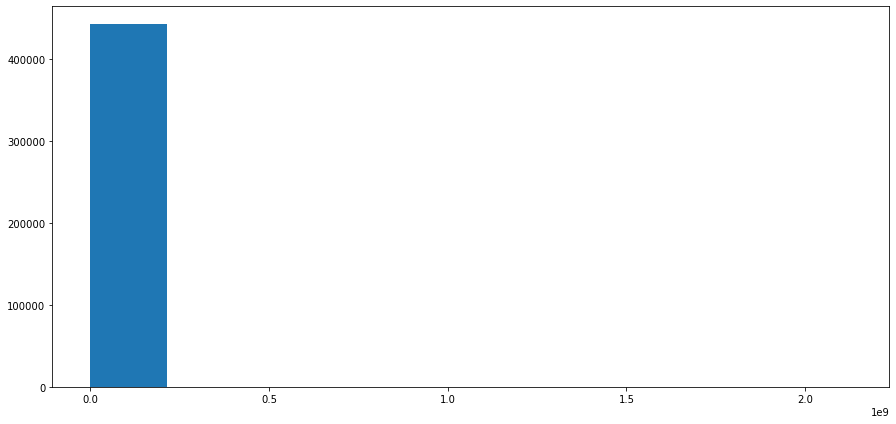

In [48]:
plt.figure(figsize=[15,7])
plt.hist(entries_count.counts);

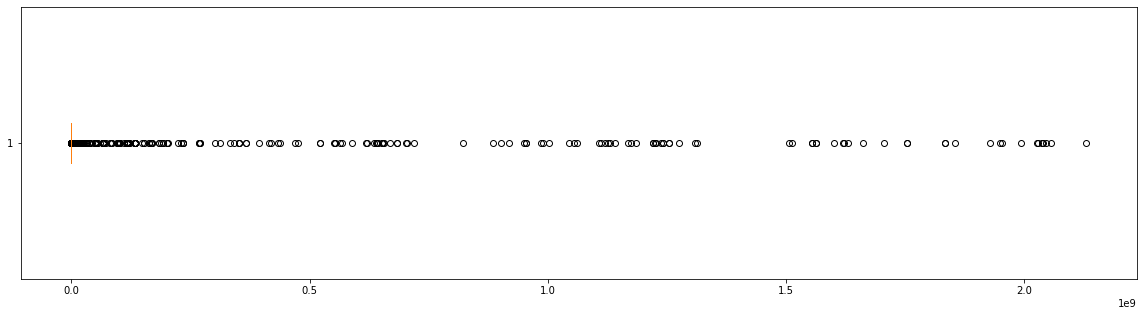

In [49]:
plt.figure(figsize = (20,5))
plt.boxplot(entries_count.counts, vert=False);

In [50]:
entries_count.counts.quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.98])

0.75    1204.00
0.80    1444.00
0.85    1761.00
0.90    2199.00
0.95    3058.00
0.97    4036.00
0.98    8304.84
Name: counts, dtype: float64

C:\Users\dilat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


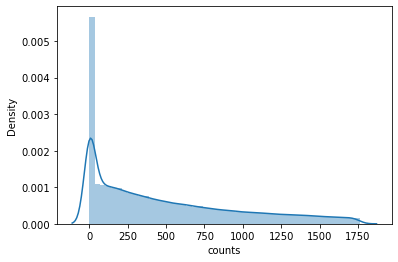

In [51]:
verix = entries_count[entries_count["counts"]<(entries_count.counts.quantile(0.85))]
ax=sns.distplot(verix["counts"])

In [52]:
entries_count["counts"] = np.where((entries_count.counts > entries_count.counts.quantile(0.85)), entries_count.counts.median(), entries_count.counts)

In [53]:
entries_count["counts"].describe()

count    443003.000000
mean        496.744819
std         443.203770
min           0.000000
25%         124.000000
50%         486.000000
75%         704.000000
max        1761.000000
Name: counts, dtype: float64

In [54]:
entries_count.sort_values(by=["counts"], ascending=False)

,turnstile,station,date,dayname,counts
253842,PTH05-R543-00-00-03-EXCHANGE PLACE,EXCHANGE PLACE,2019-12-13,Friday,1761.0
33227,B019-R149-00-00-02-NEWKIRK PLAZA,NEWKIRK PLAZA,2019-12-02,Monday,1761.0
111776,N062-R011-01-03-00-42 ST-PORT AUTH,42 ST-PORT AUTH,2019-12-06,Friday,1761.0
355730,R250-R179-00-00-06-86 ST,86 ST,2018-12-19,Wednesday,1761.0
23555,A060-R001-00-00-01-WHITEHALL S-FRY,WHITEHALL S-FRY,2019-12-21,Saturday,1761.0
...,...,...,...,...,...
422961,R610-R057-00-05-01-ATL AV-BARCLAY,ATL AV-BARCLAY,2018-12-17,Monday,0.0
422960,R610-R057-00-05-01-ATL AV-BARCLAY,ATL AV-BARCLAY,2018-12-16,Sunday,0.0
422959,R610-R057-00-05-01-ATL AV-BARCLAY,ATL AV-BARCLAY,2018-12-15,Saturday,0.0
422958,R610-R057-00-05-01-ATL AV-BARCLAY,ATL AV-BARCLAY,2018-12-14,Friday,0.0


In [55]:
entries_count[entries_count.turnstile == "R238A-R046-02-00-02-GRD CNTRL-42 ST"].groupby("dayname")[["counts"]].sum().sort_values(["counts"])

,counts
dayname,
Sunday,6315.0
Saturday,7493.0
Monday,8167.0
Tuesday,8422.0
Thursday,8430.0
Friday,8907.0
Wednesday,9026.0


In [56]:
veri = entries_count[entries_count.turnstile == "R238A-R046-02-00-02-GRD CNTRL-42 ST"].groupby("dayname")[["counts"]].sum().reset_index()

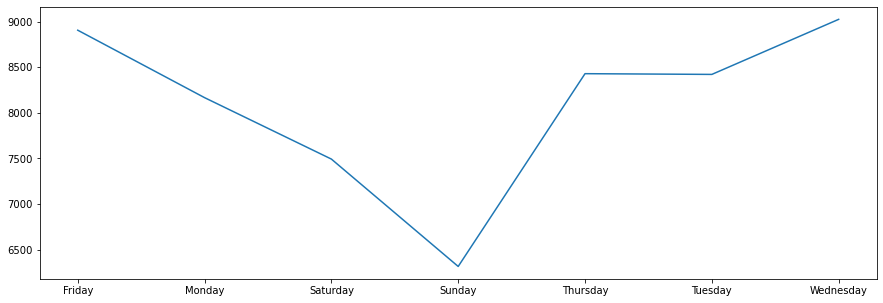

In [57]:
plt.figure(figsize=(15,5))
plt.plot(veri.dayname, veri.counts)

# top stations by entry:

In [58]:
pd.options.display.max_rows=1000

In [59]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # for no scientific notation

**Daily total counts of people exit for each turnstile**

In [60]:
mta.groupby(["turnstile","station","date", "dayname"])[["counts_exits"]].sum().sort_values("counts_exits") # shows daily total exits for each turnstile

counts_exits
turnstile                           station         date       dayname               
TRAM2-R469-00-05-01-RIT-ROOSEVELT   RIT-ROOSEVELT   2020-12-25 Friday            0.00
R262B-R195-05-00-02-161/YANKEE STAD 161/YANKEE STAD 2019-12-17 Tuesday           0.00
                                                    2019-12-16 Monday            0.00
                                                    2019-12-15 Sunday            0.00
                                                    2019-12-14 Saturday          0.00
...                                                                               ...
N325A-R218-00-05-01-ELMHURST AV     ELMHURST AV     2020-11-28 Saturday 1973082216.00
N506-R022-00-05-03-34 ST-HERALD SQ  34 ST-HERALD SQ 2020-11-28 Saturday 2036528840.00
N506-R022-00-05-04-34 ST-HERALD SQ  34 ST-HERALD SQ 2020-11-28 Saturday 2048631773.00
R523-R147-00-00-04-61 ST WOODSIDE   61 ST WOODSIDE  2019-11-30 Saturday 2106875652.00
R107-R305-00-00-02-WTC-CORTLANDT    WTC-CORTLANDT   2019-12-22 Sunday   3690987530.00

[443003 rows x 1 columns]

In [61]:
(mta.counts_exits == 0).sum()
# 0 larla sonra ilgilen

406272

In [62]:
exits_count = mta.groupby(["turnstile","date", "dayname"], as_index=False)[["counts_exits"]].sum().sort_values("counts_exits")
# a new dataset contains daily total exits for each turnstile

In [63]:
exits_count.describe()

,counts_exits
count,443003.00
mean,265272.34
std,18157631.08
min,0.00
25%,95.00
50%,355.00
75%,898.00
max,3690987530.00


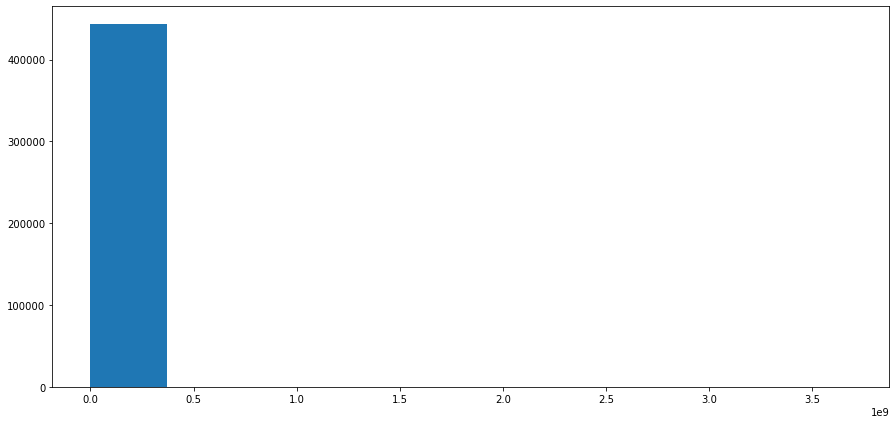

In [64]:
plt.figure(figsize=[15,7])
plt.hist(exits_count.counts_exits);

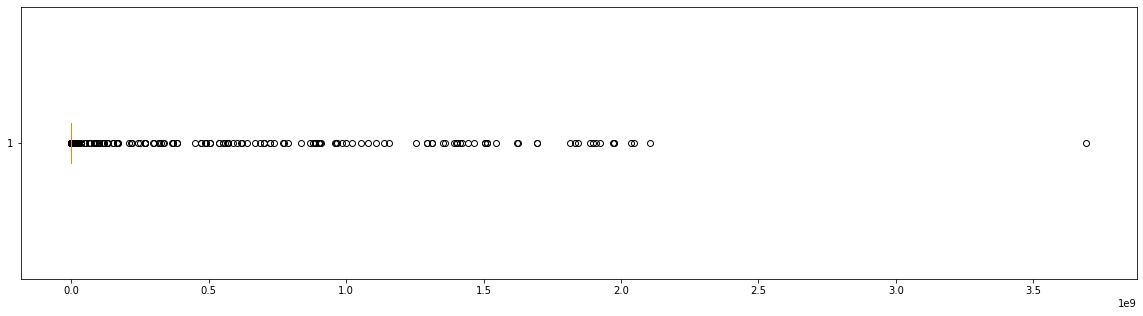

In [65]:
plt.figure(figsize = (20,5))
plt.boxplot(exits_count.counts_exits, vert=False);

In [66]:
exits_count.counts_exits.quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.98])

0.75    898.00
0.80   1108.00
0.85   1391.00
0.90   1848.00
0.95   2793.00
0.97   4001.00
0.98   8028.96
Name: counts_exits, dtype: float64

C:\Users\dilat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


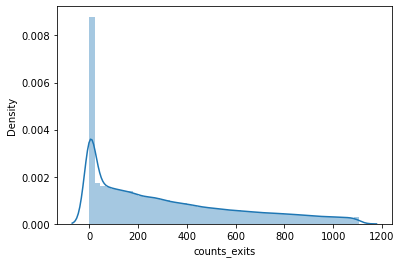

In [67]:
veriy = exits_count[exits_count["counts_exits"]<(exits_count.counts_exits.quantile(0.80))]
ax2=sns.distplot(veriy["counts_exits"])

In [68]:
exits_count["counts_exits"] = np.where((exits_count.counts_exits > exits_count.counts_exits.quantile(0.80)), exits_count.counts_exits.median(), exits_count.counts_exits)

In [69]:
exits_count["counts_exits"].describe()

count   443003.00
mean       326.68
std        271.18
min          0.00
25%         95.00
50%        355.00
75%        429.00
max       1108.00
Name: counts_exits, dtype: float64

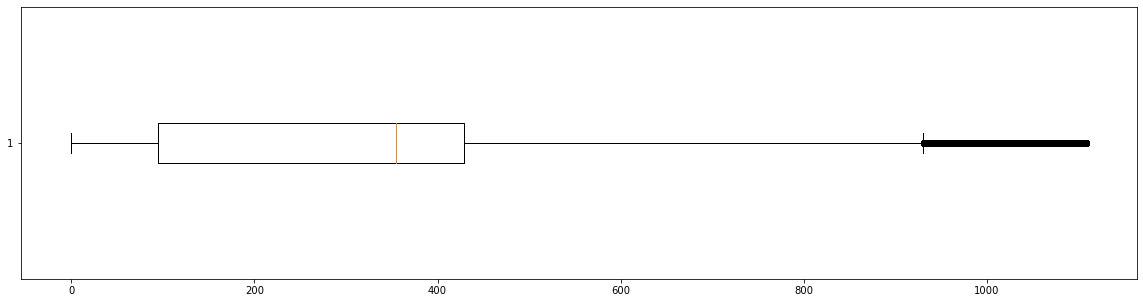

In [70]:
plt.figure(figsize = (20,5))
plt.boxplot(exits_count["counts_exits"], vert=False);

In [71]:
exits_count[exits_count.turnstile == "R238A-R046-02-00-02-GRD CNTRL-42 ST"].groupby("dayname")[["counts_exits"]].sum().sort_values(["counts_exits"])

,counts_exits
dayname,
Sunday,4568.00
Monday,4673.00
Tuesday,4737.00
Wednesday,4868.00
Thursday,5325.00
Friday,5384.00
Saturday,6985.00


In [72]:
veri = exits_count[exits_count.turnstile == "R238A-R046-02-00-02-GRD CNTRL-42 ST"].groupby("dayname")[["counts_exits"]].sum().reset_index()

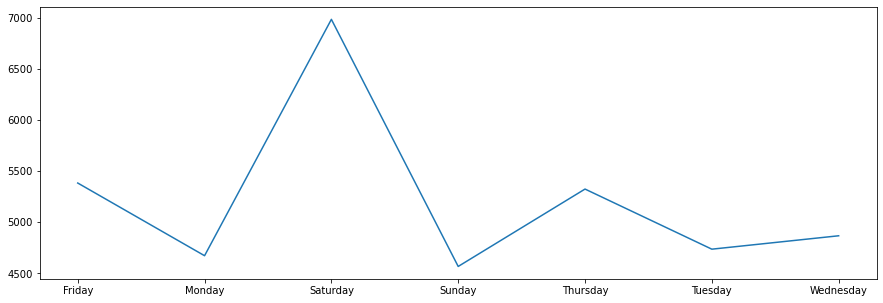

In [73]:
plt.figure(figsize=(15,5))
plt.plot(veri.dayname, veri.counts_exits)

In [74]:
mta.head()

,c/a,unit,scp,station,date,time,entries,exits,datetime,dayname,turnstile,counts,counts_exits
159748,R251,R144,00-00-00,96 ST,2018-11-24,00:00:00,22727297,14762513,2018-11-24,Saturday,R251-R144-00-00-00-96 ST,nan,nan
81786,N329,R201,00-03-01,WOODHAVEN BLVD,2018-11-24,00:00:00,654880,421891,2018-11-24,Saturday,N329-R201-00-03-01-WOODHAVEN BLVD,nan,nan
81743,N329,R201,00-03-00,WOODHAVEN BLVD,2018-11-24,00:00:00,4796678,2684091,2018-11-24,Saturday,N329-R201-00-03-00-WOODHAVEN BLVD,nan,nan
81700,N329,R201,00-00-01,WOODHAVEN BLVD,2018-11-24,00:00:00,3138883,1171747,2018-11-24,Saturday,N329-R201-00-00-01-WOODHAVEN BLVD,nan,nan
9662,A053,R088,03-00-02,CORTLANDT ST,2018-11-24,00:00:00,89354,106389,2018-11-24,Saturday,A053-R088-03-00-02-CORTLANDT ST,nan,nan


In [75]:
mta.isnull().sum()

c/a                0
unit               0
scp                0
station            0
date               0
time               0
entries            0
exits              0
datetime           0
dayname            0
turnstile          0
counts          5076
counts_exits    5076
dtype: int64

**TRAFFIC**

In [76]:
mta["traffic"] = mta["counts"] + mta["counts_exits"]

In [77]:
mta["traffic"].describe()

count      2667707.00
mean         92707.75
std       13870297.67
min              0.00
25%             19.00
50%            102.00
75%            311.00
max     3940596484.00
Name: traffic, dtype: float64

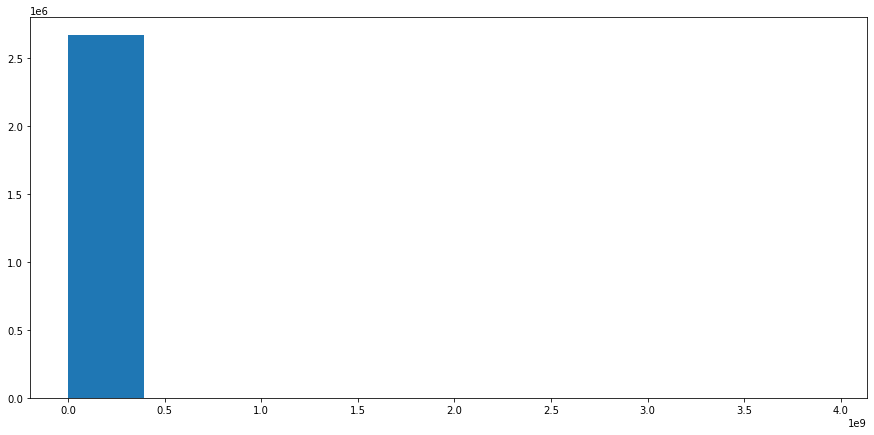

In [78]:
plt.figure(figsize=[15,7])
plt.hist(mta["traffic"]);

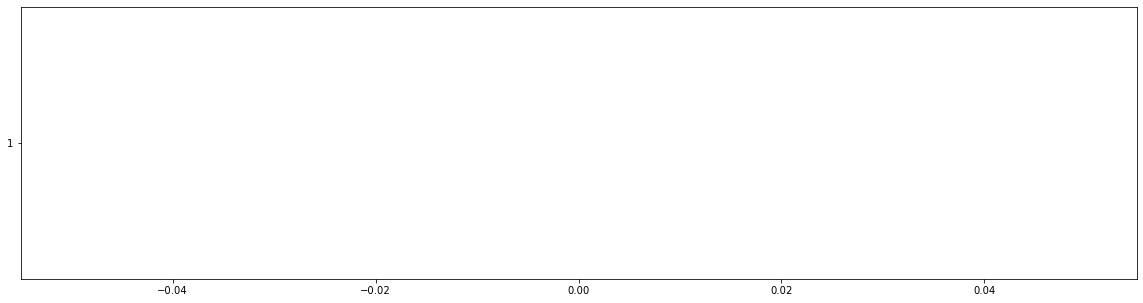

In [79]:
plt.figure(figsize = (20,5))
plt.boxplot(mta.traffic, vert=False);

In [80]:
mta["traffic"].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.98])

0.75    311.00
0.80    391.00
0.85    501.00
0.90    663.00
0.95    962.00
0.97   1199.00
0.98   1398.00
Name: traffic, dtype: float64

C:\Users\dilat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


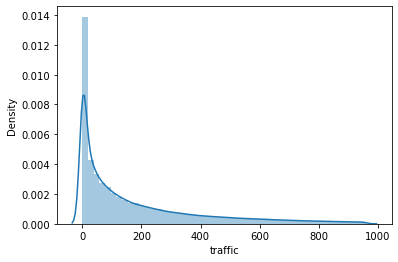

In [81]:
veriz = mta[mta["traffic"]<(mta["traffic"].quantile(0.95))]
ax=sns.distplot(veriz["traffic"])

In [82]:
mta["traffic"] = np.where((mta["traffic"] > mta["traffic"].quantile(0.95)), mta["traffic"].median(), mta["traffic"])

In [83]:
mta["traffic"].describe()

count   2667707.00
mean        174.93
std         212.30
min           0.00
25%          19.00
50%         102.00
75%         249.00
max         962.00
Name: traffic, dtype: float64

In [84]:
traffic = mta.groupby("dayname")[["traffic"]].sum().sort_values(by=["traffic"]).reset_index()

In [85]:
traffic

,dayname,traffic
0,Sunday,47735151.00
1,Saturday,56416984.00
2,Tuesday,71474630.00
3,Wednesday,71813497.00
4,Monday,72044742.00
5,Thursday,73445956.00
6,Friday,73735306.00


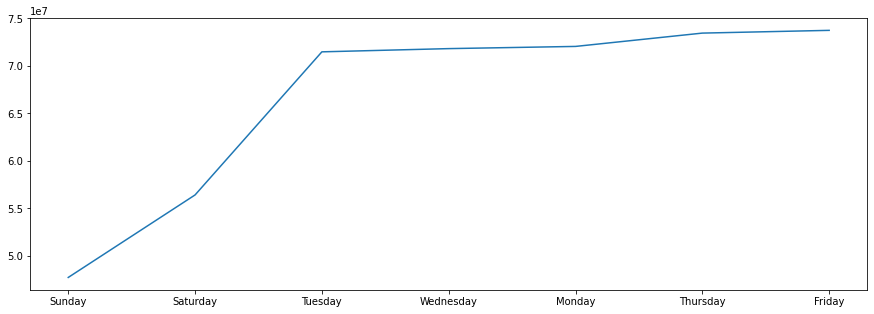

In [86]:
plt.figure(figsize=(15,5))
plt.plot(traffic.dayname, traffic.traffic)

In [87]:
trafficbyturnstile = mta.groupby(["turnstile","station"])[["traffic"]].sum().sort_values(by=["traffic"],ascending=False).reset_index().head(15)

In [88]:
trafficbyturnstile

,turnstile,station,traffic
0,H037-R349-00-00-00-SUTTER AV,SUTTER AV,244291.00
1,R414-R162-00-00-00-ELDER AV,ELDER AV,244176.00
2,R529-R208-00-00-00-103 ST-CORONA,103 ST-CORONA,241967.00
3,R529-R208-00-00-04-103 ST-CORONA,103 ST-CORONA,239058.00
4,N124-R103-00-03-02-BROADWAY JCT,BROADWAY JCT,238832.00
5,R528-R097-00-00-00-JUNCTION BLVD,JUNCTION BLVD,235942.00
6,R530-R310-00-00-04-111 ST,111 ST,233423.00
7,R186-R036-00-00-00-DYCKMAN ST,DYCKMAN ST,230193.00
8,R284-R243-00-00-03-170 ST,170 ST,228846.00
9,R529-R208-00-05-00-103 ST-CORONA,103 ST-CORONA,228779.00


In [89]:
indices = range(len(trafficbyturnstile))

In [90]:
trafficbyturnstile = trafficbyturnstile.set_index('turnstile')

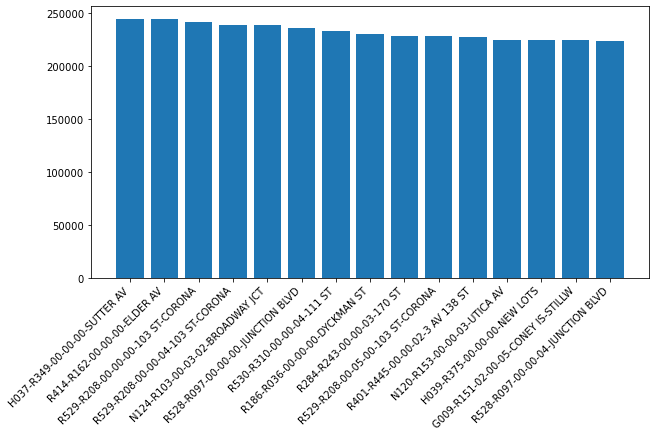

In [91]:
plt.figure(figsize=[10,5])
plt.bar(trafficbyturnstile.index, trafficbyturnstile.traffic)
plt.xticks(rotation=45, ha='right');

## new added stuff: group by station version

In [92]:
trafficbySTATION = mta.groupby(["station"])[["traffic"]].sum().sort_values(by=["traffic"],ascending=False).reset_index().head(15)

In [93]:
trafficbySTATION

,station,traffic
0,34 ST-PENN STA,12300708.00
1,23 ST,7843454.00
2,FULTON ST,7522039.00
3,GRD CNTRL-42 ST,7154372.00
4,86 ST,7066216.00
5,34 ST-HERALD SQ,6873973.00
6,42 ST-PORT AUTH,6639269.00
7,125 ST,6314034.00
8,59 ST,6227517.00
9,TIMES SQ-42 ST,6042140.00


In [94]:
indices2 = range(len(trafficbySTATION))

In [95]:
trafficbySTATION = trafficbySTATION.set_index('station')

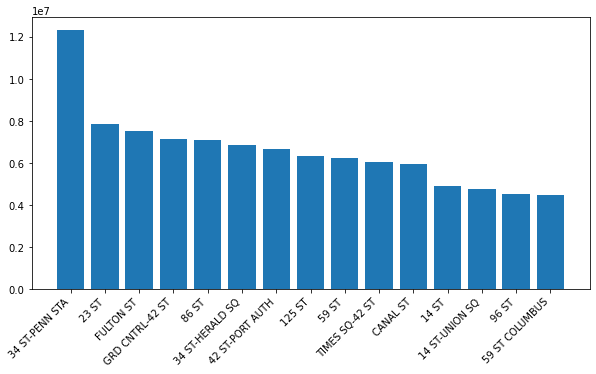

In [96]:
plt.figure(figsize=[10,5])
plt.bar(trafficbySTATION.index, trafficbySTATION.traffic)
plt.xticks(rotation=45, ha='right');